In [35]:
import h5py
import pydicom
from pydicom.dataset import Dataset, FileMetaDataset
from pydicom.sequence import Sequence
from matplotlib import pyplot as plt
import numpy as np

In [15]:
%matplotlib inline

In [3]:
f = h5py.File('file_brain_AXFLAIR_200_6002425.h5','r')

In [6]:
list(f.keys())

['ismrmrd_header', 'kspace', 'reconstruction_rss']

In [12]:
img = f['reconstruction_rss'][:]

In [14]:
img.shape

(16, 320, 320)

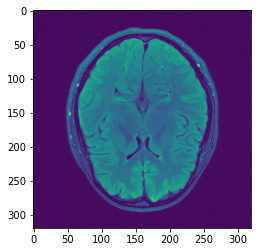

In [17]:
plt.imshow(img[0,:,:])

In [52]:
image_max = 1024
scale = image_max / np.percentile(img, 99)
pixels_scaled = np.clip((scale * img[0,:,:]), 0, image_max).astype('int16')


In [53]:
pixels_scaled.max()

1024

In [21]:
f['ismrmrd_header'].value

<ipython-input-21-1369c5940bd7>:1: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  f['ismrmrd_header'].value


b'<?xml version="1.0" encoding="utf-8"?>\n<ismrmrdHeader xmlns="http://www.ismrm.org/ISMRMRD" xmlns:xs="http://www.w3.org/2001/XMLSchema" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xsi:schemaLocation="http://www.ismrm.org/ISMRMRD ismrmrd.xsd">\n   <studyInformation>\n      <studyTime>09:30:04</studyTime>\n   </studyInformation>\n   <measurementInformation>\n      <measurementID>45219_136713935_136713944_1189</measurementID>\n      <patientPosition>HFS</patientPosition>\n      <protocolName>AX FLAIR_FBB</protocolName>\n      <frameOfReferenceUID>1.3.12.2.1107.5.2.19.45219.1.20190613092200672.0.0.0</frameOfReferenceUID>\n   </measurementInformation>\n   <acquisitionSystemInformation>\n      <systemVendor>SIEMENS</systemVendor>\n      <systemModel>Skyra</systemModel>\n      <systemFieldStrength_T>2.8936</systemFieldStrength_T>\n      <relativeReceiverNoiseBandwidth>0.793</relativeReceiverNoiseBandwidth>\n      <receiverChannels>20</receiverChannels>\n      <coilLabel>\n        

In [22]:
dcm = pydicom.dcmread('301.dcm')

In [23]:
pixels = dcm.pixel_array

In [30]:
pixels.min()

-29

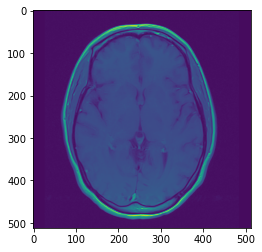

In [26]:
plt.imshow(pixels)

In [ ]:
# File meta info data elements
file_meta = FileMetaDataset()
file_meta.MediaStorageSOPClassUID = '1.2.840.10008.5.1.4.1.1.4'
file_meta.MediaStorageSOPInstanceUID = "1.2.3"
file_meta.ImplementationClassUID = "1.2.3.4

# Main data elements
ds = Dataset()

dt = datetime.datetime.now()
ds.ContentDate = dt.strftime('%Y%m%d')
timeStr = dt.strftime('%H%M%S.%f')  # long format with micro seconds
ds.ContentTime = timeStr
ds.Modality = 'MR'
ds.ModalitiesInStudy = ['', 'PR', 'MR', '']
ds.StudyDescription = 'MY STUDY' # FILL FROM XML '' 'MRI BRAIN WITH AND WITHOUT IV CONTRAST'

ds.PatientName = '1898817175' # FILL FROM FILENAME
ds.PatientID = '9174164112' # FILL FROM FILENAME
ds.PatientBirthDate = '19860405'
ds.PatientSex = 'F'
ds.PatientAge = '029Y'
ds.PatientIdentityRemoved = 'YES'

# OPTIONALLY FILL FROM CONTEXT ds.BodyPartExamined = 'BRAIN'
# OPTIONALLY FILL FROM XML ds.ScanningSequence = 'SE'
ds.MRAcquisitionType = '2D'
# OPTIONALLY FILL FROM XML ds.SequenceName = 'opFSE'
ds.SliceThickness = "5.0" #FILL FROM XML
ds.RepetitionTime = "602.0" #FILL FROM XML
ds.EchoTime = "10.4" #FILL FROM XML
ds.ImagingFrequency = "49.377199" #FILL FROM XML
ds.ImagedNucleus = '1H'
ds.EchoNumbers = "1"
ds.MagneticFieldStrength = "1.16" #FILL FROM XML
ds.SpacingBetweenSlices = "6.0" #FILL FROM XML
ds.NumberOfPhaseEncodingSteps = "230" #FILL FROM XML
ds.EchoTrainLength = "3" #FILL FROM XML
ds.PercentSampling = "0.0" #FILL FROM XML
ds.PercentPhaseFieldOfView = "90.0" #FILL FROM XML
ds.ReconstructionDiameter = "220.0" #FILL FROM XML
ds.ReceiveCoilName = 'RAPID Head' #FILL FROM XML
ds.AcquisitionMatrix = [0, 288, 230, 0] #FILL FROM XML
ds.InPlanePhaseEncodingDirection = 'ROW' #FILL FROM XML
ds.FlipAngle = "90.0" #FILL FROM XML
ds.PatientPosition = 'HFS' #FILL FROM XML
ds.RectilinearPhaseEncodeReordering = 'LINEAR' #FILL FROM XML
ds.NumberOfKSpaceTrajectories = 76 #FILL FROM XML
ds.StudyInstanceUID = '9999.201195313229306300504165090941650322040' #
ds.SeriesInstanceUID = '9999.77565704772180596049766113144111491928' #
ds.StudyID = '' #FILL FROM XML
ds.InstanceNumber = "14" #FILL FROM XML/CONTEXT
ds.PatientOrientation = ['0.988018', '0.14265'] # NOT POSSIBLE - CHECK
ds.ImagePositionPatient = [-96.26828, -112.8608, 38.50235] # NOT POSSIBLE - CHECK
ds.ImageOrientationPatient = [0.988018, 0.142657, -0.0589, -0.133943, 0.98216, 0.131983] # NOT POSSIBLE - CHECK
ds.FrameOfReferenceUID = '9999.307577518163987444448414094854502648367'
ds.ImagesInAcquisition = "26" # NOT POSSIBLE - CHECK
ds.SliceLocation = "44.54" # NOT POSSIBLE - CHECK
ds.SamplesPerPixel = 1
ds.PhotometricInterpretation = 'MONOCHROME2'
ds.NumberOfFrames = "1"
ds.Rows = 320
ds.Columns = 320
ds.PixelSpacing = [0.4296875, 0.4296875] #FILL FROM XML
ds.PixelAspectRatio = [1, 1] #FILL FROM XML
ds.BitsAllocated = 16 #FILL FROM CONVERSION
ds.BitsStored = 12  #FILL FROM CONVERSION
ds.HighBit = 11  #FILL FROM CONVERSION
ds.PixelRepresentation = 1  #FILL FROM CONVERSION
ds.SmallestImagePixelValue = 0  #FILL FROM CONVERSION
ds.LargestImagePixelValue = 1024  #FILL FROM CONVERSION
ds.BurnedInAnnotation = 'NO'
ds.WindowCenter = "213.0"  #FILL FROM CONVERSION
ds.WindowWidth = "426.0" #FILL FROM CONVERSION
ds.LossyImageCompression = '00'
ds.StudyStatusID = 'COMPLETED'
ds.ResultsID = ''


ds.PixelData = pixels_scaled

ds.file_meta = file_meta
ds.is_implicit_VR = False
ds.is_little_endian = True
ds.save_as(r'301_from_codify.dcm', write_like_original=False)

In [32]:
512*512*2

524288